# HW3_대구맛집_클러스터
2022236204 홍정빈

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import re
import json
import requests
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings(action = 'ignore')

In [8]:
# 구별로 json 불러오기

url = 'https://www.daegufood.go.kr/kor/api/tasty.html?mode=json&addr='
url_jung = url + '%EC%A4%91%EA%B5%AC'
url_dong = url + '%EB%8F%99%EA%B5%AC'
url_seo = url + '%EC%84%9C%EA%B5%AC'
url_nam = url + '%EB%82%A8%EA%B5%AC'
url_buk = url + '%EB%B6%81%EA%B5%AC'
url_su = url + '%EC%88%98%EC%84%B1%EA%B5%AC'
url_dal = url + '%EB%8B%AC%EC%84%9C%EA%B5%AC'
url_daln = url + '%EB%8B%AC%EC%84%B1%EA%B5%B0'

r_jung = requests.get(url_jung)
r_dong = requests.get(url_dong)
r_seo = requests.get(url_seo)
r_nam = requests.get(url_nam)
r_buk = requests.get(url_buk)
r_su = requests.get(url_su)
r_dal = requests.get(url_dal)
r_daln = requests.get(url_daln)

json_jung = r_jung.json(strict=False)
json_dong = r_dong.json(strict=False)
json_seo = r_seo.json(strict=False)
json_nam = r_nam.json(strict=False)
json_buk = r_buk.json(strict=False)
json_su = r_su.json(strict=False)
json_dal = r_dal.json(strict=False)
json_daln = r_daln.json(strict=False)

dg_mat = [json_jung, json_dong, json_seo, json_nam, json_buk, json_su, json_dal, json_daln]

In [9]:
dg_list=[]
for i in range (len(dg_mat)) :
    for j in range (len(dg_mat[i]['data'])) :
        dg_list.append((dg_mat[i]['data'][j]['BZ_NM'], dg_mat[i]['data'][j]['GNG_CS']))

adr = pd.DataFrame(dg_list, columns=['name', 'address'])

adr.head()

,name,address
0,송림식당,대구광역시 중구 삼덕동2가 219-1
1,빈플러스 테이스팅 스푼(TASTING SPOON),대구광역시 중구 삼덕동1가 21-10
2,박석규 중앙떡볶이,대구광역시 중구 동성로2가 70-1
3,가스트로락,대구광역시 중구 대봉동 31-67
4,차이,대구광역시 중구 삼덕동1가 14-3


In [219]:
status_success = 0
adr_json = []

for i in tqdm_notebook(range(len(adr))) :   
    q = adr['address'][i]
    api = f'https://api.vworld.kr/req/address?service=address&request=getcoord&version=2.0&crs=epsg:4326&address={q}&refine=true&simple=false&format=json&type=parcel&key=52C3080F-5F83-335E-B72D-6E5156073F68'
    headers={'User-Agent':'Mozilla/5.0(Windows NT 10.0; Win64; x64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36'}
    req = requests.get(api, headers=headers)

    if req.status_code==200 : status_success+=1 
    

    adr_json.append(req.json())
       
print('925 나오면 req 전부 양호 :', status_success)
        
        

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [ ]:
adr_json[0]

In [ ]:
# 데이터를 확인하던 중 status가 'NOT_FOUND'인 데이터들이 있는 것을 찾았다.
adr_json[900]

In [ ]:
# 확인해보니 주소가 이런식으로 들어있어서 주소변환이 불가능 한 것이었다.
# 이런걸 일일이 수정해줄 수 없으니 그냥 제거하도록 한다...
adr.loc[900]

In [ ]:
# status가 OK인 것만 가져온다.
all_xy=[]

for i in range(len(adr_json)) :
    if adr_json[i]['response']['status'] == 'OK' :
        all_xy.append((adr_json[i]['response']['result']['point']['x'],
                       adr_json[i]['response']['result']['point']['y']))

In [ ]:
print(len(all_xy), 925-len(all_xy))
# 925개 주소 중 57개가 문제가 있어 제거했고 데이터는 868개가 되었다.

In [ ]:
# 구별로 따로 담아준다.
jung_xy=[]
dong_xy=[]
seo_xy=[]
nam_xy=[]
buk_xy=[]
su_xy=[]
dal_xy=[]
daln_xy=[]

for i in range(len(adr_json)) :
    if adr_json[i]['response']['status'] == 'OK' :
        if adr_json[i]['response']['refined']['structure']['level2'] == '중구' :
            jung_xy.append((adr_json[i]['response']['result']['point']['x'],
                             adr_json[i]['response']['result']['point']['y']))
        elif adr_json[i]['response']['refined']['structure']['level2'] == '동구' :
            dong_xy.append((adr_json[i]['response']['result']['point']['x'],
                             adr_json[i]['response']['result']['point']['y']))    
        elif adr_json[i]['response']['refined']['structure']['level2'] == '서구' :
            seo_xy.append((adr_json[i]['response']['result']['point']['x'],
                             adr_json[i]['response']['result']['point']['y']))   
        elif adr_json[i]['response']['refined']['structure']['level2'] == '남구' :
            nam_xy.append((adr_json[i]['response']['result']['point']['x'],
                             adr_json[i]['response']['result']['point']['y']))   
        elif adr_json[i]['response']['refined']['structure']['level2'] == '북구' :
            buk_xy.append((adr_json[i]['response']['result']['point']['x'],
                             adr_json[i]['response']['result']['point']['y']))
        elif adr_json[i]['response']['refined']['structure']['level2'] == '수성구' :
            su_xy.append((adr_json[i]['response']['result']['point']['x'],
                             adr_json[i]['response']['result']['point']['y']))   
        elif adr_json[i]['response']['refined']['structure']['level2'] == '달서구' :
            dal_xy.append((adr_json[i]['response']['result']['point']['x'],
                             adr_json[i]['response']['result']['point']['y']))   
        elif adr_json[i]['response']['refined']['structure']['level2'] == '달성군' :
            daln_xy.append((adr_json[i]['response']['result']['point']['x'],
                             adr_json[i]['response']['result']['point']['y']))   

In [ ]:
# 리스트 -> 데이터프레임
df_jung_xy = pd.DataFrame(jung_xy, columns=['x_longitude', 'y_latitude'])
df_dong_xy = pd.DataFrame(dong_xy, columns=['x_longitude', 'y_latitude'])
df_seo_xy = pd.DataFrame(seo_xy, columns=['x_longitude', 'y_latitude'])
df_nam_xy = pd.DataFrame(nam_xy, columns=['x_longitude', 'y_latitude'])
df_buk_xy = pd.DataFrame(buk_xy, columns=['x_longitude', 'y_latitude'])
df_su_xy = pd.DataFrame(su_xy, columns=['x_longitude', 'y_latitude'])
df_dal_xy = pd.DataFrame(dal_xy, columns=['x_longitude', 'y_latitude'])
df_daln_xy = pd.DataFrame(daln_xy, columns=['x_longitude', 'y_latitude'])

# object형 -> float형
df_jung_xy = df_jung_xy.astype(float)
df_dong_xy = df_dong_xy.astype(float)
df_seo_xy = df_seo_xy.astype(float) 
df_nam_xy = df_nam_xy.astype(float) 
df_buk_xy = df_buk_xy.astype(float) 
df_su_xy = df_su_xy.astype(float)
df_dal_xy = df_dal_xy.astype(float) 
df_daln_xy = df_daln_xy.astype(float)

In [145]:
# 지오코딩 API가 안 불러와질 때를 대비해서 미리 저장해둔 csv 파일을 불러온다.
df_jung_xy = pd.read_csv('중구.csv')
df_dong_xy = pd.read_csv('동구.csv')
df_seo_xy = pd.read_csv('서구.csv') 
df_nam_xy = pd.read_csv('남구.csv') 
df_buk_xy = pd.read_csv('북구.csv') 
df_su_xy = pd.read_csv('수성구.csv')
df_dal_xy = pd.read_csv('달서구.csv') 
df_daln_xy = pd.read_csv('달성군.csv')

'''
변수 복붙용
df_jung
df_dong
df_seo
df_nam
df_buk
df_su
df_dal
df_daln
'''

In [146]:
# 각 점들이 centers들과 얼마나 떨어져 있는지 각각 거리 비교할 때 사용
# 거리 '측정'이 아닌 '비교'라서 루트를 씌우든 안 씌우든 비교하는데에는 상관이 없기 때문에 굳이 루트를 씌울 필요는 없다.
# c: centers(x,y),  o: others(x,y)
def distance(c, o):
    return sum((c - o) ** 2)/len(c)


def group_center(g):
    g = np.array(g)
    return g.mean(axis=0)


def cluster(data, k, seed=2022, iter_num=25):
    logs = []
    np.random.seed(seed)
    centers = data[np.random.choice(len(data), size=k, replace=False)]
    for it in range(iter_num):
        group = {}
        for i in range(k):
            group[i] = []
        # find nearest center
        for row in data:
            temp = []
            for i in range(k):
                temp.append(distance(centers[i], row))
            group[np.argmin(temp)].append(row.tolist())

        # plot data store
        for i in range(k):
            group_temp = np.array(group[i])
            group_temp = np.c_[group_temp, np.full(len(group_temp), i)]
            if i == 0:
                grouped = group_temp
            else:
                grouped = np.append(grouped, group_temp, axis = 0)

        # update center
        centers_new = []
        for i in range(k):
            centers_new.append(group_center(group[i]).tolist())
        centers_new = np.array(centers_new)
        # if updated center == center, break

        if np.sum(centers - centers_new) == 0:
            break
        else:
            centers = centers_new
            logs.append(grouped)
    return grouped, logs, it  



In [221]:
data = np.array(df_jung_xy)
k = 10
grouped, logs, it = cluster(data, k)
print(f'iter num:{it}') # 반복횟수

iter num:13


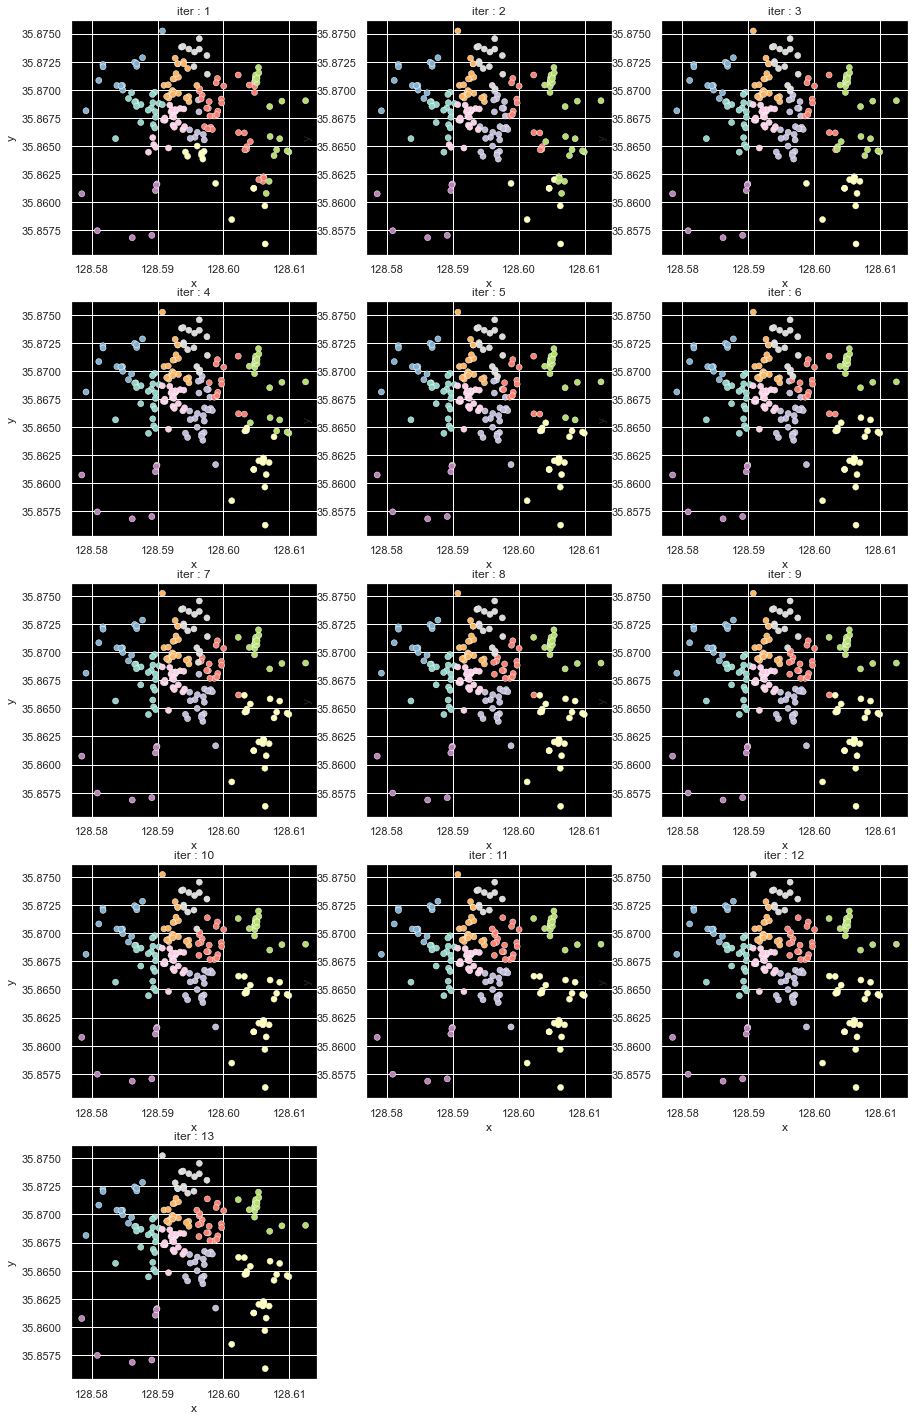

In [222]:
# 중구 클러스터링 시각화
plt.figure(figsize=(15,(it//3+1)*5)) # figsize 중 세로 길이는 도표수에 비례해서 정한다.
for i in range(it):
    plt.subplot(it//3+1, 3, i+1)  # row, col, index
    df = pd.DataFrame(logs[i])
    df.columns = ['x', 'y', 'group']
    sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'group', palette='Set3').set_title(f'iter : {i+1}')
    plt.legend([],[], frameon=False) # 범례를 비워서 안 보이게 함. # 아예 remove하는 방법도 있는데 여기서는 안 됨

중구를 k=10으로 클러스터링 하면 13번의 반복을 거쳐야 한다.

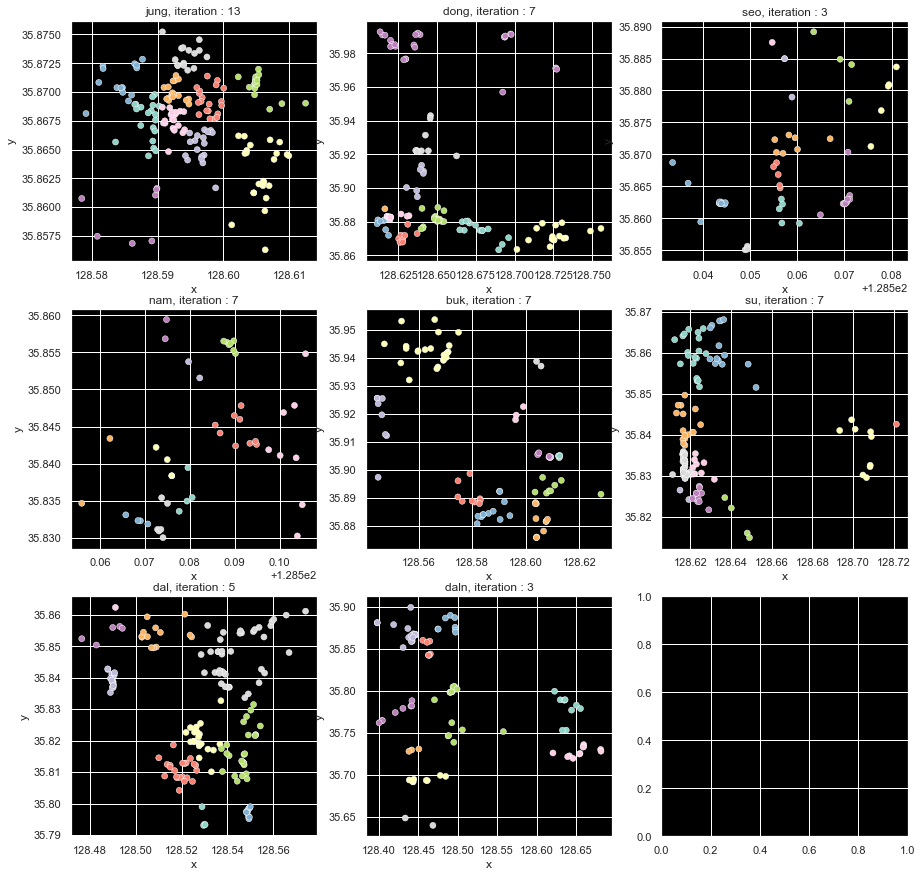

In [33]:
# 모든 구 시각화하기
# 반복문을 써서 코드를 줄이고 싶었지만 이상하게 잘 안 먹혀서 그냥 적었다ㅠㅠ
k=10

figure, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3)
figure.set_size_inches(15,15)

sns.set(rc={'axes.facecolor':'black'}) # 배경색 변경. 이유는 모르겠는데 1회 늦게 적용된다.

data1 = np.array(df_jung_xy)
grouped, logs, it = cluster(data1, k)
df1 = pd.DataFrame(logs[it-1])
df1.columns = ['x', 'y', 'group']
sns.scatterplot(data = df1, x = 'x', y = 'y', hue = 'group', palette='Set3', ax=ax1, legend = False).set_title(f'jung, iteration : {it}')

data2 = np.array(df_dong_xy)
grouped, logs, it = cluster(data2, k)
df2 = pd.DataFrame(logs[it-1])
df2.columns = ['x', 'y', 'group']
sns.scatterplot(data = df2, x = 'x', y = 'y', hue = 'group', palette='Set3', ax=ax2, legend = False).set_title(f'dong, iteration : {it}')

data3 = np.array(df_seo_xy)
grouped, logs, it = cluster(data3, k)
df3 = pd.DataFrame(logs[it-1])
df3.columns = ['x', 'y', 'group']
sns.scatterplot(data = df3, x = 'x', y = 'y', hue = 'group', palette='Set3', ax=ax3, legend = False).set_title(f'seo, iteration : {it}')

data4 = np.array(df_nam_xy)
grouped, logs, it = cluster(data4, k)
df4 = pd.DataFrame(logs[it-1])
df4.columns = ['x', 'y', 'group']
sns.scatterplot(data = df4, x = 'x', y = 'y', hue = 'group', palette='Set3', ax=ax4, legend = False).set_title(f'nam, iteration : {it}')

data5 = np.array(df_buk_xy)
grouped, logs, it = cluster(data5, k)
df5 = pd.DataFrame(logs[it-1])
df5.columns = ['x', 'y', 'group']
sns.scatterplot(data = df5, x = 'x', y = 'y', hue = 'group', palette='Set3', ax=ax5, legend = False).set_title(f'buk, iteration : {it}')

data6 = np.array(df_su_xy)
grouped, logs, it = cluster(data6, k)
df6 = pd.DataFrame(logs[it-1])
df6.columns = ['x', 'y', 'group']
sns.scatterplot(data = df6, x = 'x', y = 'y', hue = 'group', palette='Set3', ax=ax6, legend = False).set_title(f'su, iteration : {it}')

data7 = np.array(df_dal_xy)
grouped, logs, it = cluster(data7, k)
df7 = pd.DataFrame(logs[it-1])
df7.columns = ['x', 'y', 'group']
sns.scatterplot(data = df7, x = 'x', y = 'y', hue = 'group', palette='Set3', ax=ax7, legend = False).set_title(f'dal, iteration : {it}')

data8 = np.array(df_daln_xy)
grouped, logs, it = cluster(data8, k)
df8 = pd.DataFrame(logs[it-1])
df8.columns = ['x', 'y', 'group']
sns.scatterplot(data = df8, x = 'x', y = 'y', hue = 'group', palette='Set3', ax=ax8, legend = False).set_title(f'daln, iteration : {it}')

plt.show()

In [69]:
df_jung = pd.DataFrame(df1['group'].value_counts().sort_index())
df_dong = pd.DataFrame(df2['group'].value_counts().sort_index())
df_seo = pd.DataFrame(df3['group'].value_counts().sort_index())
df_nam = pd.DataFrame(df4['group'].value_counts().sort_index())
df_buk = pd.DataFrame(df5['group'].value_counts().sort_index())
df_su = pd.DataFrame(df6['group'].value_counts().sort_index())
df_dal = pd.DataFrame(df7['group'].value_counts().sort_index())
df_daln = pd.DataFrame(df8['group'].value_counts().sort_index())

## 과제 1-1
좌표로 변환된 대구맛집들에 대해 K=10인 경우 각 행정구(중구, 남구, 달성군 등등) 별로 10개 k-mean cluster의 비율은 어떠한가?

 - 클러스터 x 행정구 형태의 표를 만들고 클러스터의 숫자를 채운뒤 해당 표의 각 행과 열의 합계 항목을 통해 답변하라.

In [70]:
df_cluster = pd.concat([df_jung,df_dong,df_seo,df_nam,df_buk,df_su,df_dal,df_daln],axis=1)
df_cluster

,group,group,group,group,group,group,group,group
0.0,20,14,5,4,5,19,4,10
1.0,23,16,5,4,23,9,22,8
2.0,19,7,3,2,8,2,18,17
3.0,20,8,5,9,9,1,23,7
4.0,15,7,11,4,12,14,11,8
5.0,17,1,7,2,11,16,13,3
6.0,17,16,4,7,8,4,27,16
7.0,20,25,1,8,3,10,1,11
8.0,15,10,3,6,2,30,42,2
9.0,7,26,10,2,10,11,5,8


In [75]:
df_cluster.columns = ['중구','동구','서구','남구','북구','수성구','달서구','달성군']
df_cluster.set_index([['c01', 'c02', 'c03', 'c04', 'c05', 'c06', 'c07', 'c08', 'c09', 'c10']], inplace=True)

df_cluster

,중구,동구,서구,남구,북구,수성구,달서구,달성군
c01,20,14,5,4,5,19,4,10
c02,23,16,5,4,23,9,22,8
c03,19,7,3,2,8,2,18,17
c04,20,8,5,9,9,1,23,7
c05,15,7,11,4,12,14,11,8
c06,17,1,7,2,11,16,13,3
c07,17,16,4,7,8,4,27,16
c08,20,25,1,8,3,10,1,11
c09,15,10,3,6,2,30,42,2
c10,7,26,10,2,10,11,5,8


In [76]:
isum = pd.DataFrame(df_cluster.sum(axis=1), columns=['합계']) # 행(인덱스) 합계

In [77]:
df_cluster = pd.concat([df_cluster, isum], axis=1)
df_cluster

,중구,동구,서구,남구,북구,수성구,달서구,달성군,합계
c01,20,14,5,4,5,19,4,10,81
c02,23,16,5,4,23,9,22,8,110
c03,19,7,3,2,8,2,18,17,76
c04,20,8,5,9,9,1,23,7,82
c05,15,7,11,4,12,14,11,8,82
c06,17,1,7,2,11,16,13,3,70
c07,17,16,4,7,8,4,27,16,99
c08,20,25,1,8,3,10,1,11,79
c09,15,10,3,6,2,30,42,2,110
c10,7,26,10,2,10,11,5,8,79


In [78]:
csum = pd.DataFrame(df_cluster.sum(axis=0), columns=['합계']) # 열(컬럼) 합계
csum = csum.transpose() # 컬럼 합계는 행-열의 위치를 바꿔준다.

In [80]:
df_cluster = pd.concat([df_cluster, csum], axis=0)

In [81]:
df_cluster

,중구,동구,서구,남구,북구,수성구,달서구,달성군,합계
c01,20,14,5,4,5,19,4,10,81
c02,23,16,5,4,23,9,22,8,110
c03,19,7,3,2,8,2,18,17,76
c04,20,8,5,9,9,1,23,7,82
c05,15,7,11,4,12,14,11,8,82
c06,17,1,7,2,11,16,13,3,70
c07,17,16,4,7,8,4,27,16,99
c08,20,25,1,8,3,10,1,11,79
c09,15,10,3,6,2,30,42,2,110
c10,7,26,10,2,10,11,5,8,79


## 과제 1-2
- 초기값을 다르게 설정한 경우에 결과는 어떻게 달라지는가? 

이번에는 k 초기값을 3으로 설정해보자!

In [216]:
'''
함수를 사용해보려 했는데... 이상하게 또 작동을 안 한다ㅠㅠ

def k_means_c(df_gu_xy, k):
    data = np.array(df_gu_xy)
    grouped, logs, it = cluster(data, k)
    df = pd.DataFrame(logs[it-1])
    df.columns = ['x', 'y', 'group']
    df_gu = pd.DataFrame(df['group'].value_counts().sort_index())

어쩔 수 없이 for문 사용
'''


df_gu_xy = [df_jung_xy,df_dong_xy,df_seo_xy,df_nam_xy,df_buk_xy,df_su_xy,df_dal_xy,df_daln_xy]
k = 3
df_gu = []
for i in range(8):
    data = np.array(df_gu_xy[i])
    grouped, logs, it = cluster(data, k)
    df = pd.DataFrame(logs[it-1])
    df.columns = ['x', 'y', 'group']
    a = pd.DataFrame(df['group'].value_counts().sort_index())
    df_gu.append(a)

In [217]:
df_cluster3 = pd.concat([df_gu[0],df_gu[1],df_gu[2],df_gu[3],df_gu[4],df_gu[5],df_gu[6],df_gu[7]],axis=1)
df_cluster3.columns = ['중구','동구','서구','남구','북구','수성구','달서구','달성군']
df_cluster3.set_index([['c01', 'c02', 'c03']], inplace=True)

isum = pd.DataFrame(df_cluster3.sum(axis=1), columns=['합계'])
df_cluster3 = pd.concat([df_cluster3, isum], axis=1)

csum = pd.DataFrame(df_cluster3.sum(axis=0), columns=['합계'])
csum = csum.transpose()
df_cluster3 = pd.concat([df_cluster3, csum], axis=0)

df_cluster3



,중구,동구,서구,남구,북구,수성구,달서구,달성군,합계
c01,47,78,30,5,58,35,81,22,356
c02,40,24,17,16,25,10,51,27,210
c03,86,28,7,27,8,71,34,41,302
합계,173,130,54,48,91,116,166,90,868
